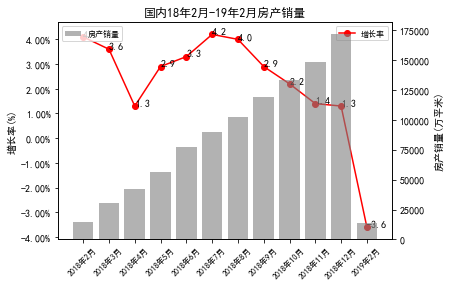

In [2]:
#国家统计局找到的商品房销售月度数据
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from pylab import mpl
worksheet = xlrd.open_workbook('month_data.xlsx')
Data_sheet = worksheet.sheets()[0]
col = Data_sheet.ncols
sales = []
growth_rate = []
x_label = []
for i in range(1,col):
    x_label.append(Data_sheet.cell_value(2,i))#month
    sales.append(Data_sheet.cell_value(3,i))#sales
    growth_rate.append(Data_sheet.cell_value(4,i))#growth_rate
plt.rcParams['font.sans-serif']=['SimHei']
x_label = x_label[::-1]
sales = sales[::-1]
growth_rate = growth_rate[::-1]
x_label[0]
x_pos = np.arange(len(x_label))
fmt = '%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)#设置百分比形式的坐标轴
fig = plt.figure()
ax1 = fig.add_subplot(111)
#y坐标双重对应图 在第一张图处理x轴!!!debug了好久
plt.xticks(x_pos)
#旋转
plt.title("国内18年2月-19年2月房产销量")
ax1.set_xticklabels(x_label,fontsize=8,rotation = 45)
ax1.plot(x_pos,growth_rate,'or-',label=u'增长率',alpha=1)
ax1.yaxis.set_major_formatter(yticks)
for i,(_x,_y) in enumerate(zip(x_pos,growth_rate)):  
    plt.text(_x,_y,growth_rate[i],color='black',fontsize=10,)  #将数值显示在图形上
ax1.legend(loc=1)
ax1.set_ylim([min(growth_rate)-0.5,max(growth_rate)+0.5])
ax1.set_ylabel('增长率(%)')
plt.legend(prop={'family':'SimHei','size':8})  #设置中文
ax2 = ax1.twinx() # this is the important function  
plt.bar(x_pos,sales,alpha=0.6,color='gray',label=u'房产销量')
ax2.set_ylabel('房产销量(万平米)')
ax2.legend(loc=2)
ax2.set_ylim([0, max(sales)+10000])  #设置y轴取值范围
plt.legend(prop={'family':'SimHei','size':8})
plt.show()